In [1]:
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import os
os.chdir(r"C:\Training\Academy\Statistics (Python)\Datasets")

In [2]:
df = pd.read_csv("simp_clust.csv", index_col=0)
df.head(2)

,X1,X2
Name,,
A,23,150
B,24,167


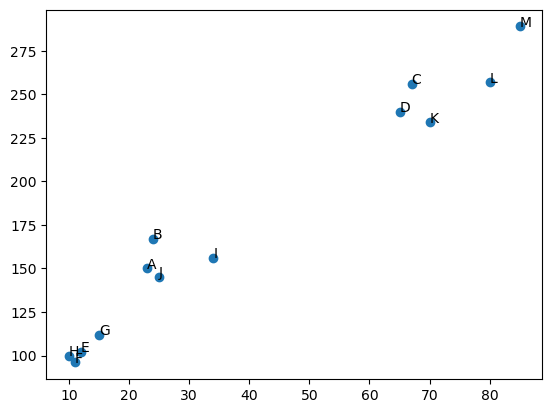

In [3]:
plt.scatter(df['X1'],df['X2'])
for i in range(0,df.shape[0]):
    plt.text(x=df['X1'].values[i], y=df['X2'].values[i],s=list(df.index)[i])
plt.show()

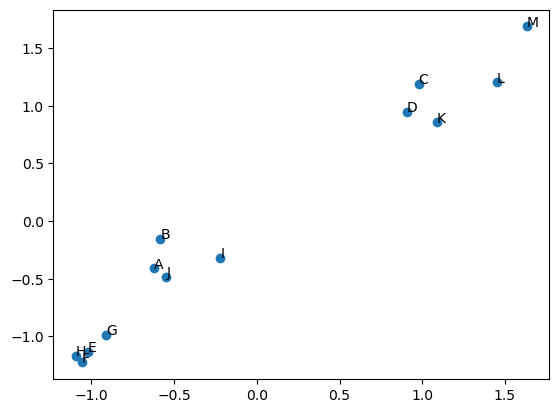

In [4]:
scaler = StandardScaler().set_output(transform='pandas')
df_scaled = scaler.fit_transform(df)
plt.scatter(df_scaled['X1'],df_scaled['X2'])
for i in range(0,df_scaled.shape[0]):
    plt.text(x=df_scaled['X1'].values[i], y=df_scaled['X2'].values[i],s=list(df_scaled.index)[i])
plt.show()

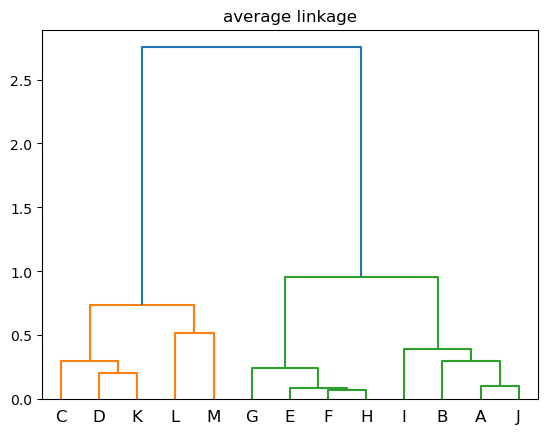

In [5]:
link = "average"
mergings = linkage(df_scaled,method=link)
dendrogram(mergings, labels=list(df_scaled.index))
plt.title(link+" linkage")
plt.show()

## Milk Ingredients

In [7]:
milk = pd.read_csv("milk.csv", index_col=0)
milk.head(2)

,water,protein,fat,lactose,ash
Animal,,,,,
HORSE,90.1,2.6,1.0,6.9,0.35
ORANGUTAN,88.5,1.4,3.5,6.0,0.24


In [8]:
scaler = StandardScaler().set_output(transform='pandas')
milk_scaled = scaler.fit_transform(milk)

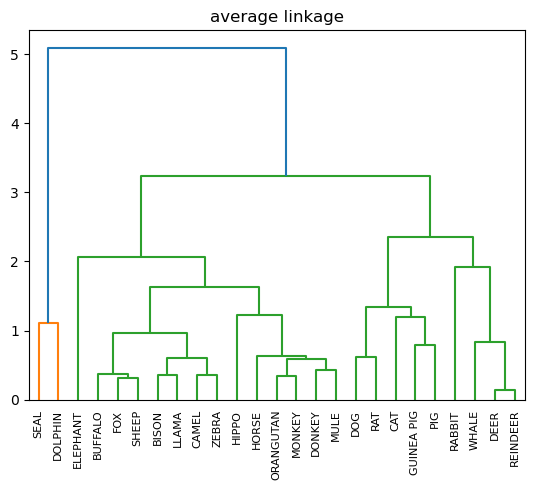

In [9]:
link = "average"
mergings = linkage(milk_scaled,method=link)
dendrogram(mergings, labels=list(milk_scaled.index))
plt.title(link+" linkage")
plt.xticks(fontsize=8, rotation=90)
plt.show()

In [10]:
clust = AgglomerativeClustering(n_clusters=2, linkage='average')
clust.fit(milk_scaled)
silhouette_score(milk_scaled, clust.labels_)

0.5186847578981009

Evaluate silhouette scores for different number of clusters

In [12]:
scores = []
n_clust = [2,3,4,5,6]
for i in n_clust:
    clust = AgglomerativeClustering(n_clusters=i, linkage='average')
    clust.fit(milk_scaled)
    scores.append(silhouette_score(milk_scaled, clust.labels_))
print(scores)
i_max = np.argmax(scores)
print("Best no. of Clusters:", n_clust[i_max])

[0.5186847578981009, 0.48757649189546187, 0.416015383673761, 0.3830100222472541, 0.374284230035704]
Best no. of Clusters: 2


In [13]:
clust = AgglomerativeClustering(n_clusters=2, linkage='average')
clust.fit(milk_scaled)
silhouette_score(milk_scaled, clust.labels_)

0.5186847578981009

In [14]:
df_clust = pd.DataFrame( {'Animal':list(milk_scaled.index), 'cluster':list(clust.labels_) })
df_clust.sort_values('cluster')

,Animal,cluster
0,HORSE,0
22,WHALE,0
21,REINDEER,0
20,DEER,0
19,RAT,0
18,RABBIT,0
17,ELEPHANT,0
16,DOG,0
15,SHEEP,0
14,ZEBRA,0


## USArrests

In [30]:
arrests = pd.read_csv("USArrests.csv",index_col=0)
scaler = StandardScaler().set_output(transform='pandas')
arrests_scaled = scaler.fit_transform(arrests)
scores = []
n_clust = [2,3,4,5,6]
for i in n_clust:
    clust = AgglomerativeClustering(n_clusters=i, linkage='average')
    clust.fit(arrests_scaled)
    scores.append(silhouette_score(arrests_scaled, clust.labels_))
print(scores)
i_max = np.argmax(scores)
print("Best no. of Clusters:", n_clust[i_max])

[0.4084890326217641, 0.34863679190476177, 0.3636819420151221, 0.3212682619092323, 0.2719787783719339]
Best no. of Clusters: 2


In [32]:
clust = AgglomerativeClustering(n_clusters=2, linkage='average')
clust.fit(arrests_scaled)
silhouette_score(arrests_scaled, clust.labels_)

0.4084890326217641

In [34]:
df_clust = pd.DataFrame( {'State':list(arrests_scaled.index), 'cluster':list(clust.labels_) })
df_clust.sort_values('cluster')

,State,cluster
0,Alabama,0
42,Texas,0
41,Tennessee,0
39,South Carolina,0
32,North Carolina,0
31,New York,0
30,New Mexico,0
27,Nevada,0
23,Mississippi,0
21,Michigan,0
